In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [ ]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

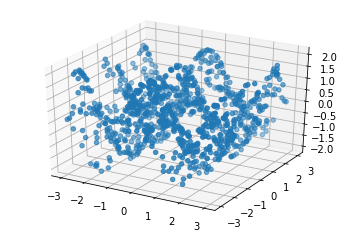

In [ ]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [ ]:
# Building model
model = nn.Sequential(
    nn.Linear(2,128),
    nn.ReLU(),
    nn.Linear(128,1)
)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
def train_model(model, criterion, optimizer, X_train, y_train, n_epochs = 1000):
  train_losses = np.zeros(n_epochs)
  for epoch in range(n_epochs):
    
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    loss.backward()
    optimizer.step()
    train_losses[epoch] = loss.item()

    if (epoch + 1) % 50 == 0:
      print ("Epoch {}/{} train loss: {}".format(epoch+1,n_epochs,loss.item()))

  return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))
train_losses = train_model(model, criterion, optimizer, X_train, y_train)

Epoch 50/1000 train loss: 0.6393147706985474
Epoch 100/1000 train loss: 0.3478338420391083
Epoch 150/1000 train loss: 0.20545709133148193
Epoch 200/1000 train loss: 0.11343980580568314
Epoch 250/1000 train loss: 0.038297757506370544
Epoch 300/1000 train loss: 0.01161379087716341
Epoch 350/1000 train loss: 0.0055954474955797195
Epoch 400/1000 train loss: 0.004161104094237089
Epoch 450/1000 train loss: 0.003240015357732773
Epoch 500/1000 train loss: 0.002642744919285178
Epoch 550/1000 train loss: 0.0023329465184360743
Epoch 600/1000 train loss: 0.003194273915141821
Epoch 650/1000 train loss: 0.0019964571110904217
Epoch 700/1000 train loss: 0.0031902978662401438
Epoch 750/1000 train loss: 0.0018251226283609867
Epoch 800/1000 train loss: 0.00295799458399415
Epoch 850/1000 train loss: 0.001830792287364602
Epoch 900/1000 train loss: 0.0016228518215939403
Epoch 950/1000 train loss: 0.0018636672757565975
Epoch 1000/1000 train loss: 0.005277890712022781


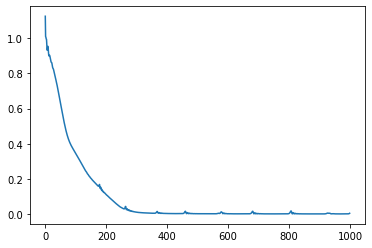

In [ ]:
plt.plot(train_losses)

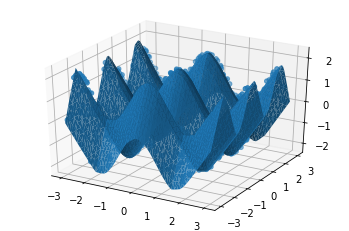

In [ ]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()

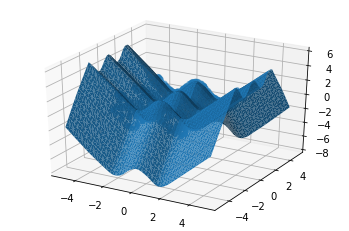

In [ ]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
with torch.no_grad():
  line = np.linspace(-5, 5, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()